In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import *

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Обработка данных

In [2]:
df = pd.read_csv('2liver.csv')
df

,Age,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset123
0,65,Female,0.7,0.1,187.0,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699.0,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490.0,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182.0,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195.0,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
582,38,Male,1.0,0.3,216.0,21,24,7.3,4.4,1.50,2
583,38,Male,NaN,0.3,216.0,21,24,7.3,4.4,1.50,2
584,38,Male,1.0,0.3,216.0,21,24,7.3,4.4,1.50,2
585,40,Male,0.6,0.1,98.0,35,31,6.0,3.2,1.10,1


Информация о датасете 2liver.csv 

Содержит информацию о заболеваемости печени:
- Возраст пациента
- Пол пациента
- Общий билирубин
- Прямой билирубин
- Щелочная фосфатаза
- Аламиноаминотрансфераза
- Аспартатаминотрансфераза
- Всего белков
- Альбумин
- Соотношение альбуминов и глобулинов
- Цель: поле, используемое для разделения данных на два набора (пациент с заболеванием печени
или без заболевания).


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         587 non-null    int64  
 1   Gender                      587 non-null    object 
 2   TotalBilirubin              585 non-null    float64
 3   Direct_Bilirubin            587 non-null    float64
 4   Alkaline_Phosphotase        586 non-null    float64
 5   Alamine_Aminotransferase    587 non-null    int64  
 6   Aspartate_Aminotransferase  587 non-null    object 
 7   Total_Protiens              587 non-null    float64
 8   Albumin                     587 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset123                  587 non-null    object 
dtypes: float64(6), int64(2), object(3)
memory usage: 50.6+ KB


In [4]:
for i in df.columns:
    print(i, sorted(df[i].unique()), end = '\n\n', sep = '\n')

Age
[4, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 78, 84, 85, 90]

Gender
['Female', 'Mal', 'Male']

TotalBilirubin
[0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.4, 4.5, 4.7, 4.9, 5.0, 5.2, 5.3, 5.5, 5.7, 5.8, 5.9, 6.2, 6.3, 6.6, 6.7, 6.8, 7.1, 7.3, 7.4, 7.5, 7.7, 7.9, 8.0, 8.2, 8.6, 8.7, 8.9, 9.4, 10.2, 10.6, 10.9, 11.0, 11.1, 11.3, 11.5, 12.1, 12.7, 14.1, 14.2, 14.5, 14.8, 15.0, 15.2, 15.6, 15.8, 15.9, 16.4, 16.6, 16.7, 17.3, 17.7, 18.0, 18.4, 18.5, 19.6, 19.8, 20.0, 20.2, 22.5, 22.6, 22.7, 22.8, 23.0, 23.2, 23.3, 25.0, 26.3, 27.2, 27.7, 30.5, 30.8, 32.6, 42.8, 75.0, nan]

Direct_Bilirubin
[0.1, 0.2, 0.3, 0.4, 0.5, 

Произведена замена названий колонок, проведён Label encoding (0 - Женщина, 1 - Мужчина)

In [5]:
df = df.rename(columns={'Dataset123': 'Bool'})
df = df.dropna()
df.loc[:, 'Aspartate_Aminotransferase'] = df['Aspartate_Aminotransferase'].replace('3a4','34')
df.loc[:, 'Bool'] = df['Bool'].replace('yes','1')
df.loc[:, 'Gender'] = df['Gender'].replace('Female','0').replace('Male','1').replace('Mal','1')
df = df.apply(pd.to_numeric, errors='coerce')
df = df.astype('float')

In [6]:
X = df.drop(columns=['Bool']) 
y = df['Bool']

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,y,test_size = 0.25, random_state = 42)

Были разработаны следующие модели:
- метод k- ближайших соседей
- логистическая регрессия
- дерево решений
- случайный лес  


In [9]:
models_name = ['KNeighborsClassifier','LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier']

In [10]:
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, Y_train)

y_pred_neighbors = KNeighborsClassifier.predict(X_test)

acc_pred_neighbors = accuracy_score(Y_test, y_pred_neighbors)
precision_pred_neighbors = precision_score(Y_test, y_pred_neighbors)
recall_pred_neighbors = recall_score(Y_test, y_pred_neighbors)
f1_pred_neighbors = f1_score(Y_test, y_pred_neighbors)
balanced_accuracy_pred_neighbors = balanced_accuracy_score(Y_test, y_pred_neighbors)

In [11]:
LogisticRegression = LogisticRegression()
LogisticRegression.fit(X_train, Y_train)
y_pred_log_regress = LogisticRegression.predict(X_test)

acc_pred_log_regress = accuracy_score(Y_test, y_pred_log_regress)
precision_pred_log_regress = precision_score(Y_test, y_pred_log_regress)
recall_pred_log_regress = recall_score(Y_test, y_pred_log_regress)
f1_pred_log_regress = f1_score(Y_test, y_pred_log_regress)
balanced_accuracy_pred_log_regress = balanced_accuracy_score(Y_test, y_pred_log_regress)

In [12]:
DecisionTreeClassifier = DecisionTreeClassifier()
DecisionTreeClassifier.fit(X_train, Y_train)
y_pred_tree = DecisionTreeClassifier.predict(X_test)

acc_pred_tree = accuracy_score(Y_test, y_pred_tree)
precision_pred_tree = precision_score(Y_test, y_pred_tree)
recall_pred_tree = recall_score(Y_test, y_pred_tree)
f1_pred_tree = f1_score(Y_test, y_pred_tree)
balanced_accuracy_pred_tree = balanced_accuracy_score(Y_test, y_pred_tree)

In [13]:
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, Y_train)
y_pred_forest = RandomForestClassifier.predict(X_test)

acc_pred_forest = accuracy_score(Y_test, y_pred_forest)
precision_pred_forest = precision_score(Y_test, y_pred_forest)
recall_pred_forest = recall_score(Y_test, y_pred_forest)
f1_pred_forest = f1_score(Y_test, y_pred_forest)
balanced_accuracy_pred_forest = balanced_accuracy_score(Y_test, y_pred_forest)

In [14]:
models_mertics = {'y_pred_neighbors': [acc_pred_neighbors, precision_pred_neighbors, recall_pred_neighbors, f1_pred_neighbors, balanced_accuracy_pred_neighbors],
              'y_pred_log_regress': [acc_pred_log_regress, precision_pred_log_regress, recall_pred_log_regress, f1_pred_log_regress, balanced_accuracy_pred_log_regress],
              'y_pred_tree': [acc_pred_tree, precision_pred_tree, recall_pred_tree, f1_pred_tree, balanced_accuracy_pred_tree],
              'y_pred_forest': [acc_pred_forest, precision_pred_forest, recall_pred_forest, f1_pred_forest, balanced_accuracy_pred_forest]}
name_metrics = ['accuracy','precision','recall','f1','balanced accuracy']


- True Positive – TP («истинно положительные») [0,0] – прогноз модели 1, реальное значение 1;
- False Positive – FP («ложно положительные») [0,1] – прогноз модели 1, реальное значение 0;
- False Negative – FN («ложно отрицательные») [1,0] – прогноз модели 0, реальное значение 1;
- True Negative– TP («истинно отрицательные») [1,1]– прогноз модели 0, реальное значение 0.

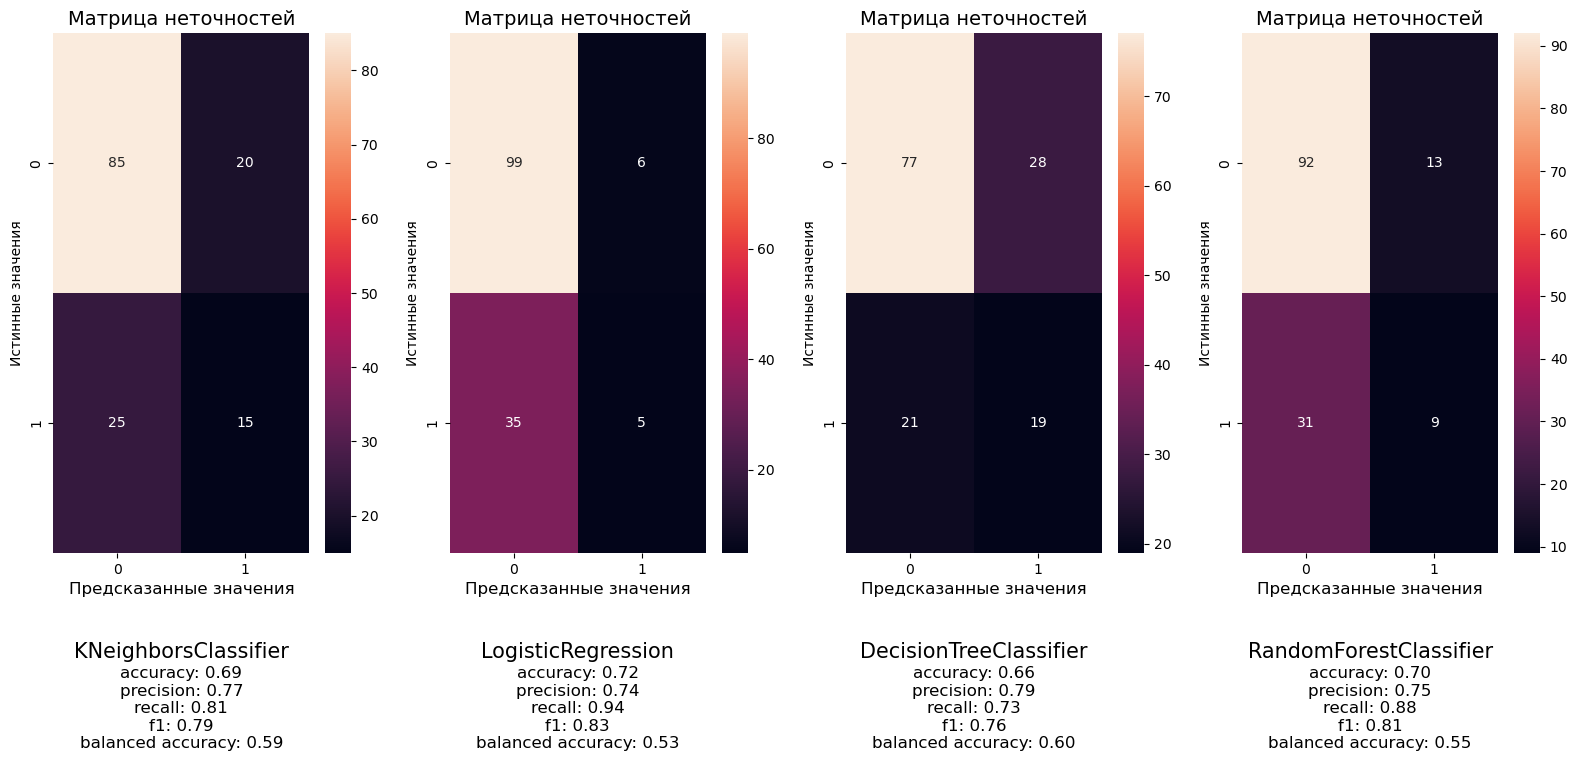

In [15]:
fig, axes = plt.subplots(1, len(models_name), figsize=(16, 8))
for i, (name, y_pred) in enumerate(models_mertics.items()):
    sns.heatmap(confusion_matrix(Y_test, globals()[name]), annot=True, ax=axes[i])
    axes[i].set_xlabel(name, fontsize=12)
    metrics_text = '\n'.join([
        f"{metric_name}: {float(metric):.2f}" if isinstance(metric, (int, float)) else f"{metric_name}: {metric}" 
        for metric_name, metric in zip(name_metrics, models_mertics[name])
    ])
    axes[i].text(0.5,-0.19, models_name[i],fontsize = 15, ha='center', va='center', transform=axes[i].transAxes, color="black")
    axes[i].text(0.5, -0.3, metrics_text, fontsize=12, ha='center', va='center', transform=axes[i].transAxes, color="black")
for ax in axes:
    ax.set_title("Матрица неточностей", fontsize=14)
    ax.set_ylabel('Истинные значения')
    ax.set_xlabel('Предсказанные значения')

plt.tight_layout()
plt.show()


Выводы по моделям:


Оценка будет проводиться по метрике recall, т.к. в методичке сказано, что "Полнота нацелена на минимизацию противоположных рисков, показывает сколько реальных объектовкласса 1 удалось обнаружить с помощью модели. Эта метрика полезна при диагностике заболеваний, так как лучше отправить пациента на повторное обследование, нежели пропустить настоящий диагноз."


Как видно из метрик, самой лучшей моделью является Логистическая регрессия, показатель метрики recall = 0.94, что является довольно таки хорошим результатом. 

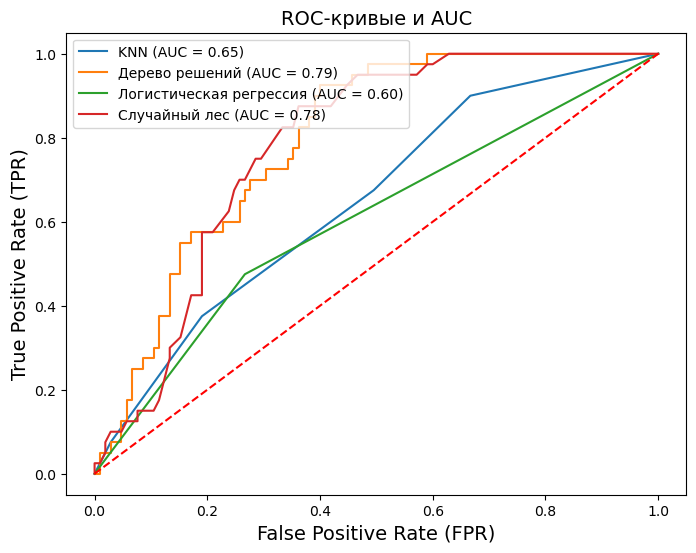

In [23]:
proba_1 = KNeighborsClassifier.predict_proba(X_test)[:, 1]
proba_2 = LogisticRegression.predict_proba(X_test)[:, 1]
proba_3 = DecisionTreeClassifier.predict_proba(X_test)[:, 1]
proba_4 = RandomForestClassifier.predict_proba(X_test)[:, 1]

plt.figure(figsize=(8, 6))
plt.title("ROC-кривые и AUC", fontsize=14)
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)

fpr, tpr, _ = roc_curve(Y_test, proba_1,pos_label=2.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'KNN (AUC = {round(roc_auc, 2)})')

fpr, tpr, _ = roc_curve(Y_test, proba_2, pos_label=2.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Дерево решений (AUC = {round(roc_auc, 2)})')

fpr, tpr, _ = roc_curve(Y_test, proba_3, pos_label=2.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Логистическая регрессия (AUC = {roc_auc:.2f})')

fpr, tpr, _ = roc_curve(Y_test, proba_4, pos_label=2.0)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Случайный лес (AUC = {roc_auc:.2f})')

plt.legend(loc="upper left", fontsize=10)
plt.plot([0, 1], [0, 1], 'r--')
plt.axis('tight')
plt.show()

На основе данных из обучения и графиков, можно предположить, что самой лучшей моделью будет "Случайный лес".
Эта модель имеет высокий показатель reccal и высокий показатель AUC. Это означает, что модель способна точно различать больных и здоровых людей.

## Вывод:
В ходе выполнения лабораторной работы были изучены методы и алгоритмы классификации, направленные на предсказание целевой переменной на основе различных характеристик данных.
По результатам анализа моделей, логистическая регрессия показала наилучшие показатели метрик качества, но низкий показатель AUC. 
В данной задаче модель "Случайный лес" показала себя лучше всего.